# **Decision Tree**

## Inspecting the dataset

In [1]:
import pandas as pd

file_path = "final_cleaned_oscars.csv"
df = pd.read_csv(file_path)

df.head()

,Year,Category,Film,Film_ID,Nominee,Winner,TMDb_ID,Popularity,Vote_Average,Genres,Director,IMDb_Rating
0,1972,Best Cinematography,1776,tt0068156,"Harry Stradling, Jr.",False,14902,6.8,6.8,"Drama, History, Musical",Peter H. Hunt,7.2
1,2019,Best Cinematography,1917,tt8579674,Roger Deakins,True,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
2,2019,Best Director,1917,tt8579674,Sam Mendes,False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
3,2019,Best Picture,1917,tt8579674,"Sam Mendes, Pippa Harris, Jayne-Ann Tenggren a...",False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2
4,2019,Best Original Screenplay,1917,tt8579674,Written by Sam Mendes & Krysty Wilson-Cairns,False,530915,46.0,8.0,"Action, Drama, War",Sam Mendes,8.2


## Feature Selection and One-Hot Encoding Categorical Column

In [37]:
df = df[['IMDb_Rating', 'Popularity', 'Vote_Average', 'Category', 'Winner']]
df['Winner'] = df['Winner'].astype(int)

df['Category'], _ = pd.factorize(df['Category'])

In [38]:
df.to_csv('dt_encoded.csv', index=False)

## Splitting data into Training and Testing sets

In [39]:
from sklearn.model_selection import train_test_split

X = df.drop('Winner', axis=1)
y = df['Winner']

# Create disjoint sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Applying SMOTENC to Balance Training Set

In [40]:
from imblearn.over_sampling import SMOTENC

categorical_features = [X.columns.get_loc('Category')]

smote = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## Saving the datasets

In [41]:
import pandas as pd

# Combine and save training data
train_data_smote = pd.DataFrame(X_train_smote, columns=X.columns)
train_data_smote['Winner'] = y_train_smote
train_data_smote.to_csv("dt_train_data_smote.csv", index=False)

# Combine and save testing data
test_data = X_test.copy()
test_data['Winner'] = y_test
test_data.to_csv("dt_test_data.csv", index=False)

## Training 3 Decision Trees (Different Roots / Depths)

## Tree 1: IMDb_Rating & Vote_Average

In [42]:
from sklearn.tree import DecisionTreeClassifier

features_tree_1 = ['IMDb_Rating', 'Vote_Average']
clf_1 = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=1)
clf_1.fit(X_train_smote[features_tree_1], y_train_smote)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_1 = clf_1.predict(X_test[features_tree_1])
print("=== Tree 1 ===")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_1))
print("Classification Report:\n", classification_report(y_test, y_pred_1))

=== Tree 1 ===
Accuracy: 0.6480582524271845
Confusion Matrix:
 [[450 215]
 [ 75  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76       665
           1       0.28      0.53      0.37       159

    accuracy                           0.65       824
   macro avg       0.57      0.60      0.56       824
weighted avg       0.75      0.65      0.68       824



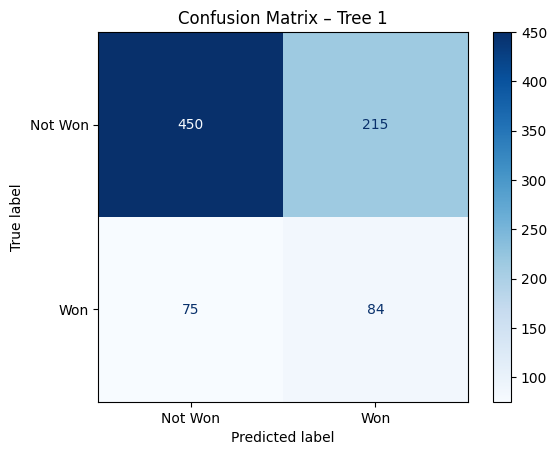

In [44]:
# Confusion Matrix Plot
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_1, display_labels=['Not Won', 'Won'], cmap='Blues')
plt.title("Confusion Matrix – Tree 1")
plt.show()

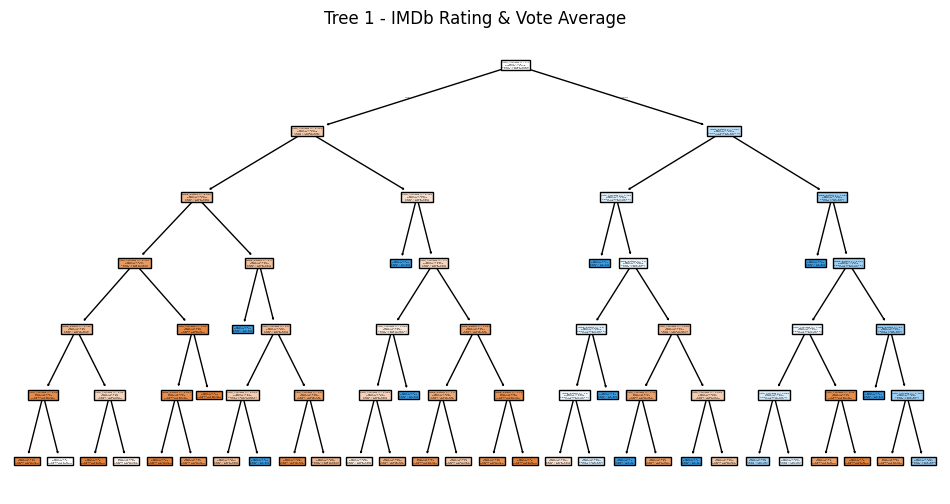

In [47]:
# Tree 1 Visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(clf_1, feature_names=features_tree_1, class_names=['Not Winner', 'Winner'], filled=True)
plt.title("Tree 1 - IMDb Rating & Vote Average")
plt.savefig('tree1_structure.png')
plt.show()

## Tree 2 – Popularity & Vote_Average

In [45]:
features_tree_2 = ['Popularity', 'Vote_Average']
clf_2 = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=2)
clf_2.fit(X_train_smote[features_tree_2], y_train_smote)

y_pred_2 = clf_2.predict(X_test[features_tree_2])
print("=== Tree 2 ===")
print("Accuracy:", accuracy_score(y_test, y_pred_2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_2))
print("Classification Report:\n", classification_report(y_test, y_pred_2))

=== Tree 2 ===
Accuracy: 0.6237864077669902
Confusion Matrix:
 [[416 249]
 [ 61  98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.63      0.73       665
           1       0.28      0.62      0.39       159

    accuracy                           0.62       824
   macro avg       0.58      0.62      0.56       824
weighted avg       0.76      0.62      0.66       824



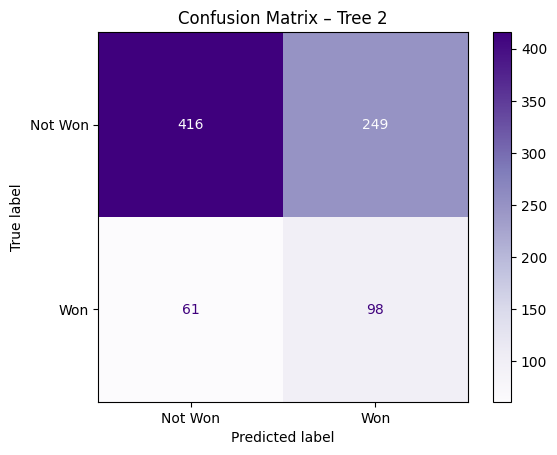

In [48]:
# Confusion Matrix Plot
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_2, display_labels=['Not Won', 'Won'], cmap='Purples')
plt.title("Confusion Matrix – Tree 2")
plt.show()

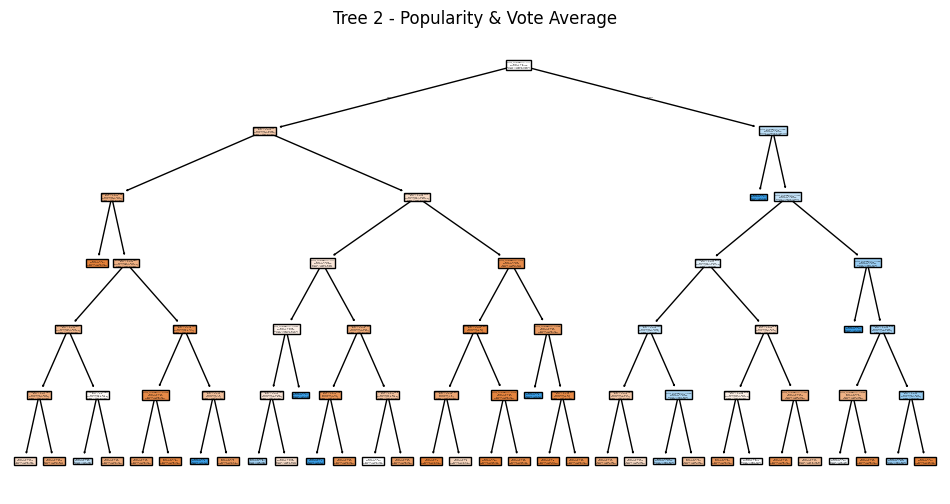

In [46]:
# Tree 2 Visualization
plt.figure(figsize=(12, 6))
plot_tree(clf_2, feature_names=features_tree_2, class_names=['Not Winner', 'Winner'], filled=True)
plt.title("Tree 2 - Popularity & Vote Average")
plt.savefig('tree2_structure.png')
plt.show()

## Tree 3 – Vote_Average, Popularity, Vote_Count

In [49]:
features_tree_3 = ['Category', 'IMDb_Rating']
clf_3 = DecisionTreeClassifier(max_depth=6, class_weight='balanced', random_state=3)
clf_3.fit(X_train_smote[features_tree_3], y_train_smote)

y_pred_3 = clf_3.predict(X_test[features_tree_3])
print("=== Tree 3 ===")
print("Accuracy:", accuracy_score(y_test, y_pred_3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_3))
print("Classification Report:\n", classification_report(y_test, y_pred_3))

=== Tree 3 ===
Accuracy: 0.6043689320388349
Confusion Matrix:
 [[406 259]
 [ 67  92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.61      0.71       665
           1       0.26      0.58      0.36       159

    accuracy                           0.60       824
   macro avg       0.56      0.59      0.54       824
weighted avg       0.74      0.60      0.65       824



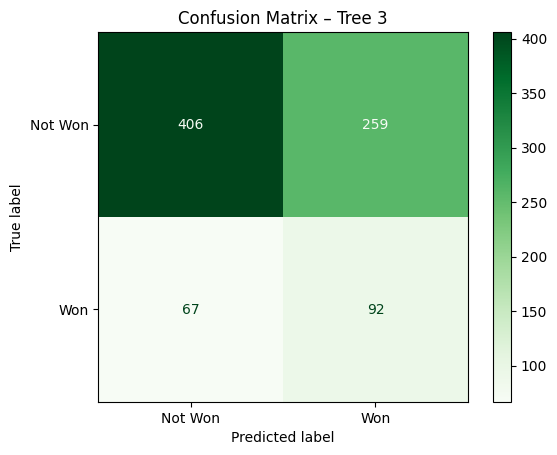

In [50]:
# Confusion Matrix Plot
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_3, display_labels=['Not Won', 'Won'], cmap='Greens')
plt.title("Confusion Matrix – Tree 3")
plt.show()

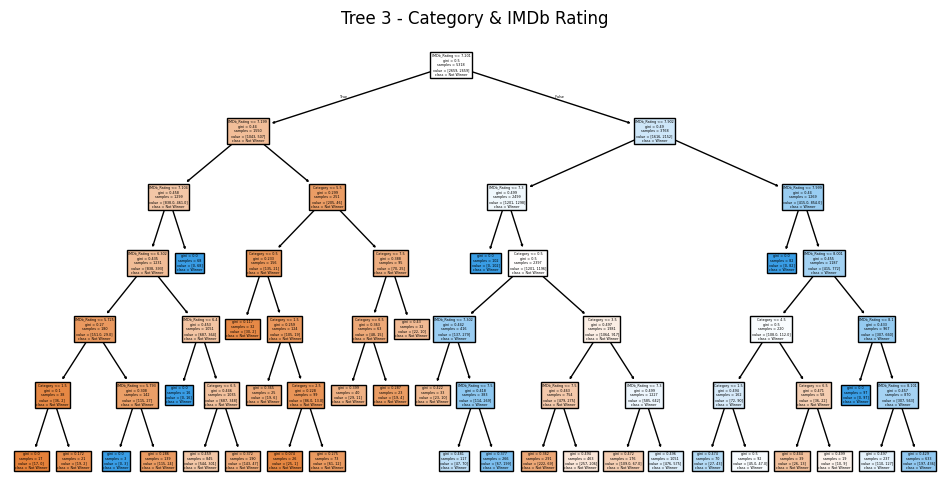

In [51]:
# Tree 3 Visualization

plt.figure(figsize=(12, 6))
plot_tree(clf_3, feature_names=features_tree_3, class_names=['Not Winner', 'Winner'], filled=True)
plt.title("Tree 3 - Category & IMDb Rating")
plt.savefig('tree3_structure.png')
plt.show()

## Compariosin of the trees

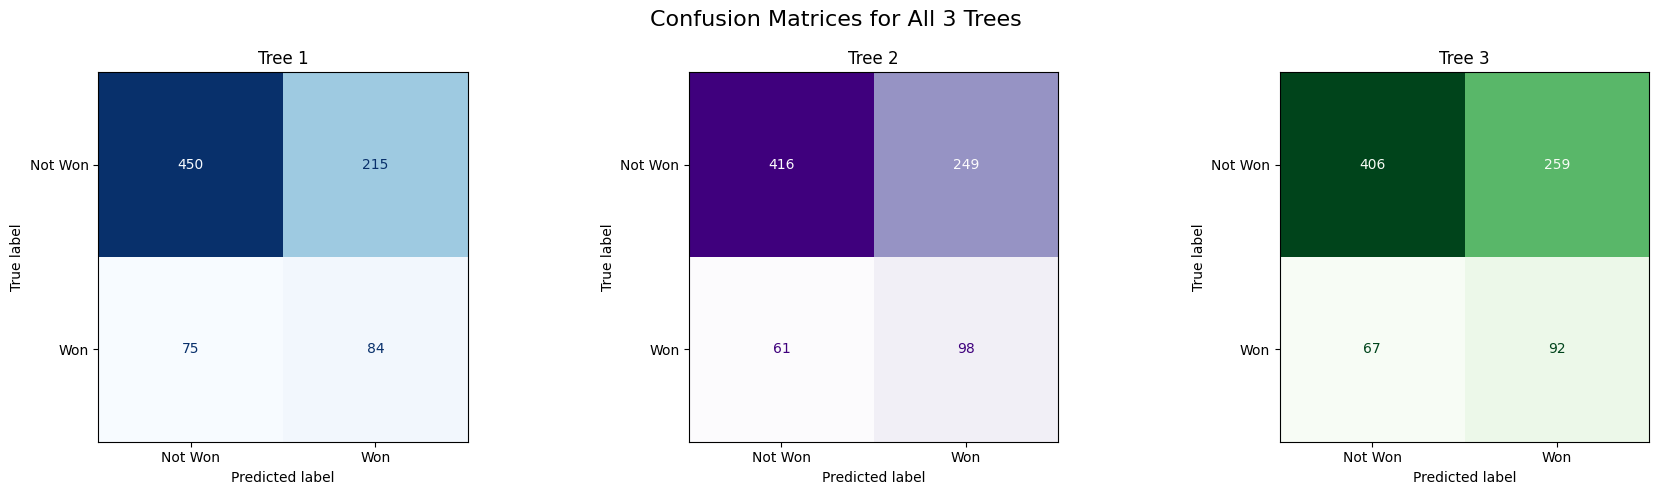

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions for each tree
predictions = [y_pred_1, y_pred_2, y_pred_3]
titles = ['Tree 1', 'Tree 2', 'Tree 3']
colors = ['Blues', 'Purples', 'Greens']

# Plot side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices for All 3 Trees", fontsize=16)

for ax, y_pred, title, cmap in zip(axes, predictions, titles, colors):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, display_labels=['Not Won', 'Won'], cmap=cmap, ax=ax, colorbar=False
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()